In [46]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [47]:
df=pd.read_csv("Sports dataset.csv")
df.columns

Index(['Unnamed: 0', 'Player', 'Team', 'Age', 'Height', 'Weight', 'Position',
       'Goals', 'Assists', 'YellowCards', 'RedCards', 'PassCompletionRate',
       'DistanceCovered', 'Sprints', 'ShotsOnTarget', 'TacklesWon',
       'CleanSheets', 'PlayerFatigue', 'MatchPressure', 'InjuryHistory',
       'TrainingHours', 'FatigueInjuryCorrelation',
       'PressurePerformanceImpact', 'EffectiveTraining', 'Season'],
      dtype='object')

In [48]:
df.rename(columns={'Unnamed: 0': 'Unnamed'}, inplace=True)
df.columns

Index(['Unnamed', 'Player', 'Team', 'Age', 'Height', 'Weight', 'Position',
       'Goals', 'Assists', 'YellowCards', 'RedCards', 'PassCompletionRate',
       'DistanceCovered', 'Sprints', 'ShotsOnTarget', 'TacklesWon',
       'CleanSheets', 'PlayerFatigue', 'MatchPressure', 'InjuryHistory',
       'TrainingHours', 'FatigueInjuryCorrelation',
       'PressurePerformanceImpact', 'EffectiveTraining', 'Season'],
      dtype='object')

In [49]:
print(df.shape)
print("Duplicate Rows:", df.duplicated().sum())

(20000, 25)
Duplicate Rows: 3372


In [50]:
df.drop_duplicates(inplace=True)
df.shape

(16628, 25)

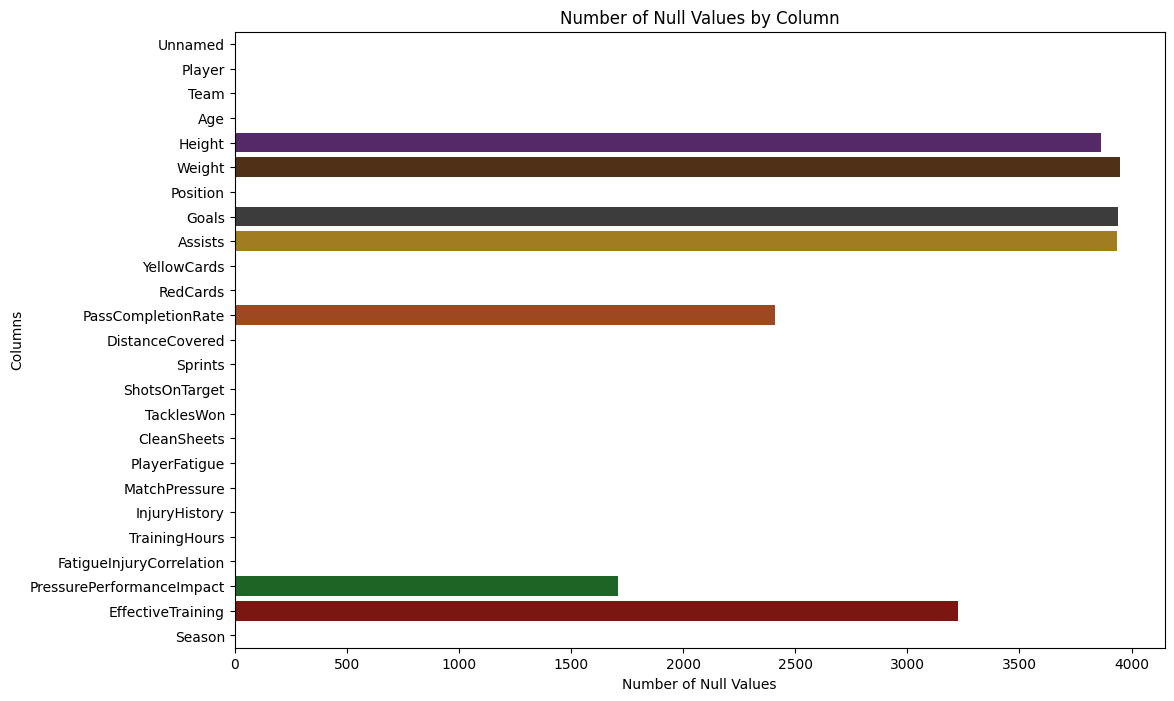

In [51]:
#Plotting the null values in the dataset
null_count=df.isna().sum()
plt.figure(figsize=(12, 8))
colors = sns.color_palette('dark',len(null_count))
sns.barplot(x=null_count.values,y=null_count.index,palette=colors)
plt.title('Number of Null Values by Column')
plt.ylabel('Columns')
plt.xlabel('Number of Null Values')
plt.show()

In [52]:
print("Before imputation\n",df.isna().sum())
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
print("After imputation\n",df.isna().sum())

Before imputation
 Unnamed                         0
Player                          0
Team                            0
Age                             0
Height                       3864
Weight                       3950
Position                        0
Goals                        3939
Assists                      3935
YellowCards                     0
RedCards                        0
PassCompletionRate           2410
DistanceCovered                 0
Sprints                         0
ShotsOnTarget                   0
TacklesWon                      0
CleanSheets                     0
PlayerFatigue                   0
MatchPressure                   0
InjuryHistory                   0
TrainingHours                   0
FatigueInjuryCorrelation        0
PressurePerformanceImpact    1711
EffectiveTraining            3228
Season                          0
dtype: int64
After imputation
 Unnamed                         0
Player                          0
Team                            

In [53]:
#String value check
def check_inconsistencies(df):
  inconsistent_data = []
  for col in ('Player','Team','Position'):
      try:
          converted_column = df[col].astype(object)
      except ValueError:
          inconsistencies = df[df[col].apply(lambda x: isinstance(x, str))]
          if not inconsistencies.empty:
            inconsistent_data.append(inconsistencies)

    # Add more checks for other columns as needed

  return inconsistent_data

inconsistent_data = check_inconsistencies(df)

# Print the inconsistent data
if inconsistent_data:
    print("Inconsistent data found:")
    for data in inconsistent_data:
        print(data)
else:
    print("No inconsistent data found")

No inconsistent data found


In [54]:
#Negative value check
def check_inconsistencies(df):
  inconsistent_data = []
  for col in ('Age', 'Height', 'Weight','Goals','Assists', 'YellowCards', 'RedCards', 'PassCompletionRate','DistanceCovered', 'Sprints', 'ShotsOnTarget', 'TacklesWon','CleanSheets', 'PlayerFatigue', 'MatchPressure', 'InjuryHistory',
       'TrainingHours', 'FatigueInjuryCorrelation',
       'PressurePerformanceImpact', 'EffectiveTraining','Season'):
      inconsistencies = df[df[col] < 0]  # Assuming age cannot be negative
      if not inconsistencies.empty:
        inconsistent_data.append(inconsistencies)

    # Add more checks for other columns as needed

  return inconsistent_data

inconsistent_data = check_inconsistencies(df)

# Print the inconsistent data
if inconsistent_data:
    print("Inconsistent data found:")
    for data in inconsistent_data:
        print(data)
else:
    print("No inconsistent data found")

No inconsistent data found


In [55]:
#Integer value check
def check_inconsistencies(df):
  inconsistent_data = []
  for col in ('Age','YellowCards', 'RedCards','Sprints', 'ShotsOnTarget', 'TacklesWon','CleanSheets','MatchPressure', 'InjuryHistory','Season'):
      try:
          converted_column = df[col].astype(int)
      except ValueError:
          inconsistencies = df[df[col].apply(lambda x: not str(x).isdigit())]
          if not inconsistencies.empty:
            inconsistent_data.append(inconsistencies)

    # Add more checks for other columns as needed

  return inconsistent_data

inconsistent_data = check_inconsistencies(df)

# Print the inconsistent data
if inconsistent_data:
    print("Inconsistent data found:")
    for data in inconsistent_data:
        print(data)
else:
    print("No inconsistent data found")

No inconsistent data found


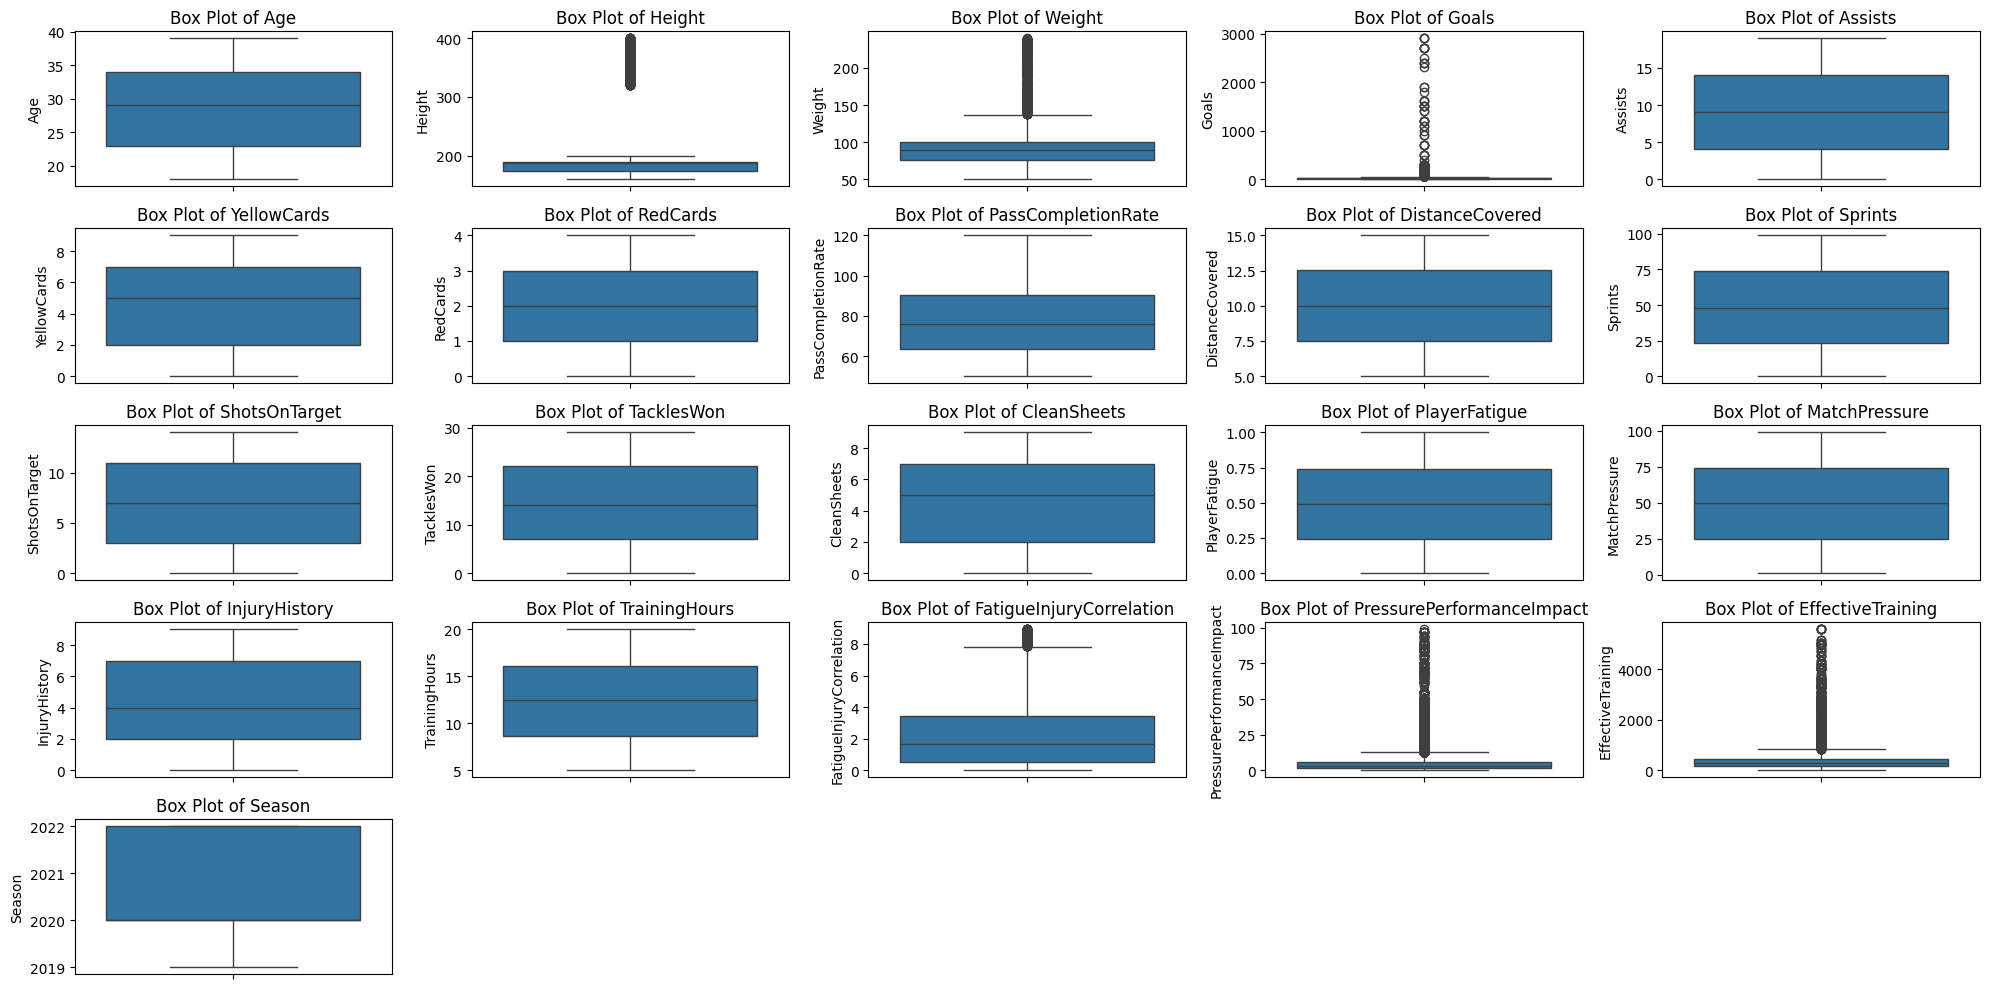

In [56]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.loc[:, ~numeric_columns.columns.str.contains('^Unnamed')]
num_columns = numeric_columns.shape[1]
num_rows = (num_columns + 4) // 5
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(num_rows, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [57]:
print(df.iloc[16])#Goals

Unnamed                              16
Player                         Player D
Team                             Team B
Age                                  28
Height                       178.570895
Weight                        89.593964
Position                        Forward
Goals                             280.0
Assists                             5.0
YellowCards                           6
RedCards                              0
PassCompletionRate                  NaN
DistanceCovered                7.370611
Sprints                              92
ShotsOnTarget                        13
TacklesWon                           17
CleanSheets                           0
PlayerFatigue                  0.304242
MatchPressure                        22
InjuryHistory                         9
TrainingHours                 19.349098
FatigueInjuryCorrelation       0.703139
PressurePerformanceImpact      3.137931
EffectiveTraining             342.67501
Season                             2021


In [58]:
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.50)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data
columns= ('Height','Weight','FatigueInjuryCorrelation','PressurePerformanceImpact','EffectiveTraining')
for column_to_handle in columns:
  df = handle_outliers_iqr(df, column_to_handle)

In [59]:
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.10)
    Q3 = data[column].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1 * IQR
    upper_bound = 50
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data
for column_to_handle in ['Goals']:
    df = handle_outliers_iqr(df, column_to_handle)


In [60]:
print(df.iloc[16])#Goals

Unnamed                              16
Player                         Player D
Team                             Team B
Age                                  28
Height                       178.570895
Weight                        89.593964
Position                        Forward
Goals                              50.0
Assists                             5.0
YellowCards                           6
RedCards                              0
PassCompletionRate                  NaN
DistanceCovered                7.370611
Sprints                              92
ShotsOnTarget                        13
TacklesWon                           17
CleanSheets                           0
PlayerFatigue                  0.304242
MatchPressure                        22
InjuryHistory                         9
TrainingHours                 19.349098
FatigueInjuryCorrelation       0.703139
PressurePerformanceImpact      3.137931
EffectiveTraining             342.67501
Season                             2021


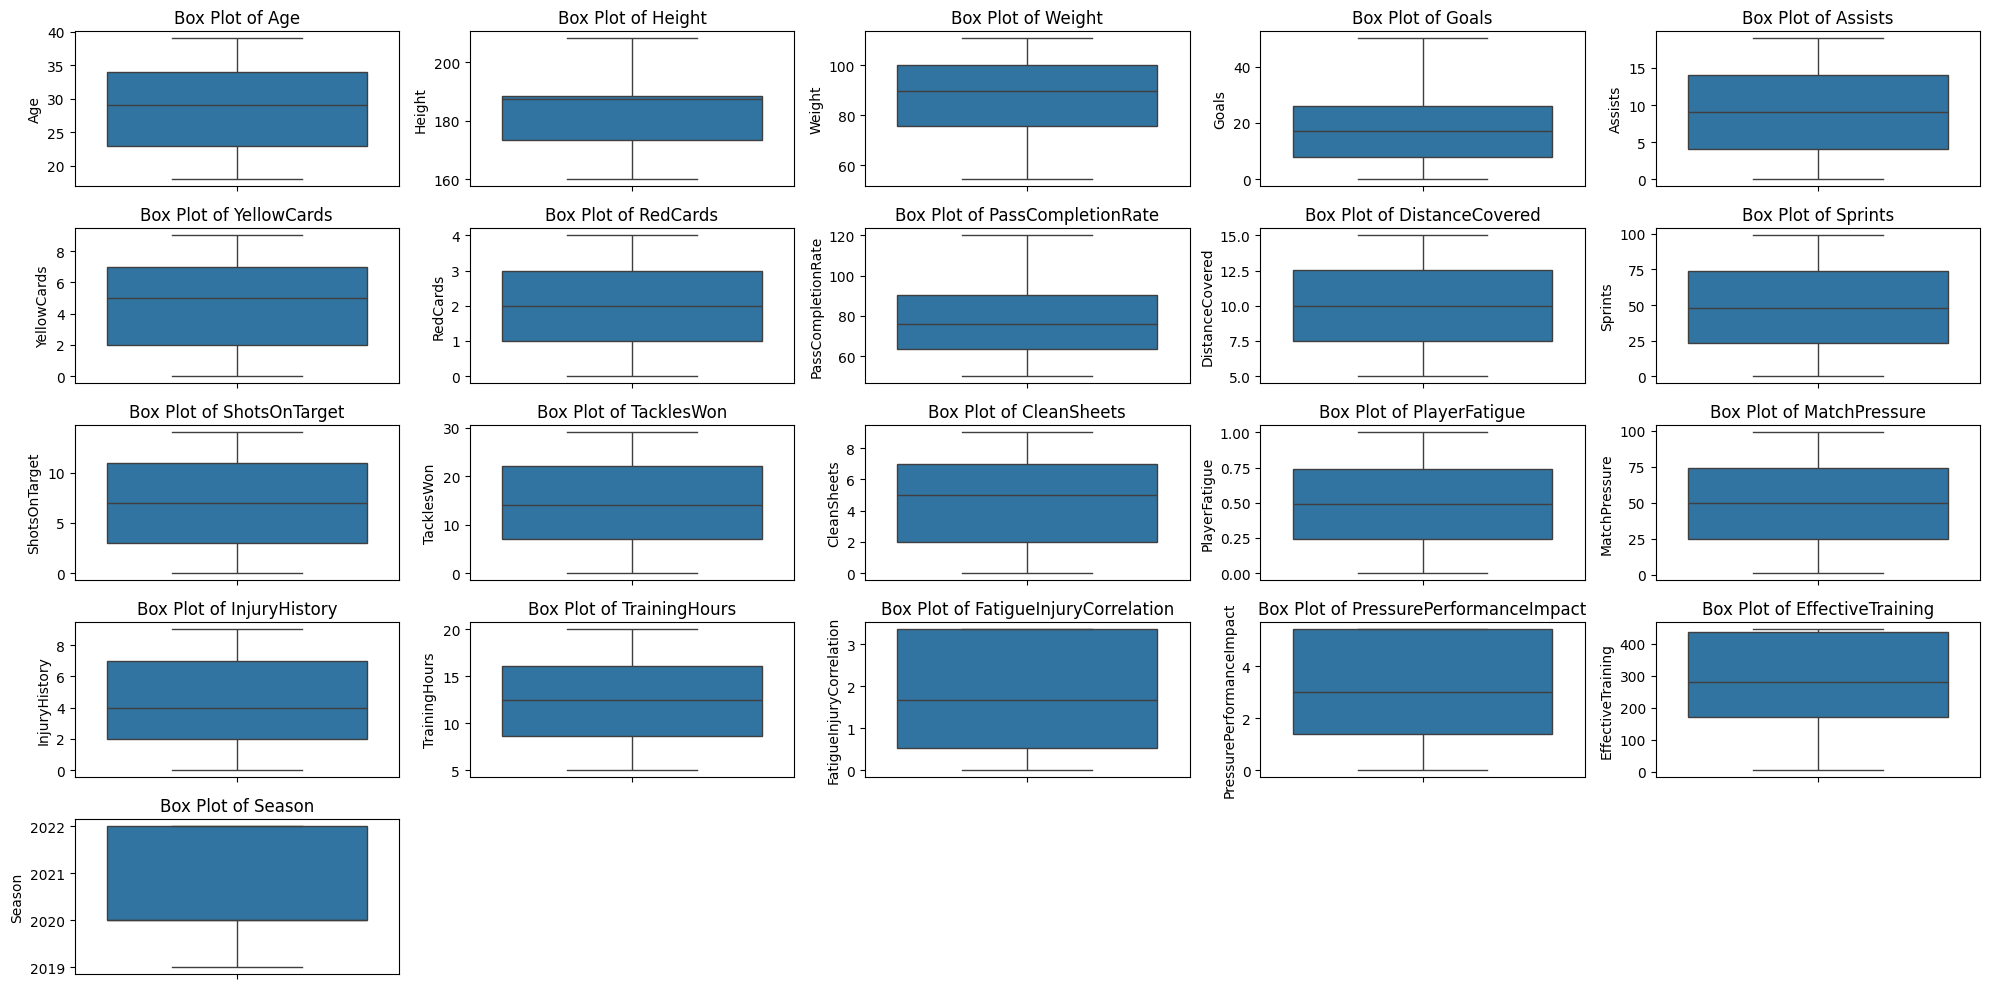

In [61]:
num_columns = numeric_columns.shape[1]
num_rows = (num_columns + 4) // 5
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(num_rows, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [62]:
print("Before imputation\n",df.isna().sum())
for column in ['Goals', 'Assists', 'PassCompletionRate','PressurePerformanceImpact','EffectiveTraining']:
    df[column].fillna(df[column].mean(), inplace=True)
print("After imputation\n",df.isna().sum())

Before imputation
 Unnamed                         0
Player                          0
Team                            0
Age                             0
Height                          0
Weight                          0
Position                        0
Goals                        3939
Assists                      3935
YellowCards                     0
RedCards                        0
PassCompletionRate           2410
DistanceCovered                 0
Sprints                         0
ShotsOnTarget                   0
TacklesWon                      0
CleanSheets                     0
PlayerFatigue                   0
MatchPressure                   0
InjuryHistory                   0
TrainingHours                   0
FatigueInjuryCorrelation        0
PressurePerformanceImpact    1711
EffectiveTraining            3228
Season                          0
dtype: int64
After imputation
 Unnamed                      0
Player                       0
Team                         0
Age    

In [63]:
df

,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,YellowCards,...,TacklesWon,CleanSheets,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season
0,0,Player C,Team C,31,164.238236,64.899554,Defender,11.000000,2.000000,4,...,22,6,0.374540,55,0,18.390595,1.864902,1.416667,247.074763,2022
1,1,Player D,Team C,22,164.489643,55.636159,Defender,2.000000,16.000000,8,...,27,6,0.950714,96,8,15.017219,0.222857,5.410714,216.066045,2019
2,2,Player A,Team C,27,208.241980,89.325850,Defender,19.188431,13.000000,8,...,23,5,0.731994,36,8,17.966084,0.000000,5.410714,359.936777,2022
3,3,Player C,Team C,29,184.567349,54.390918,Forward,13.000000,1.000000,3,...,3,4,0.598658,37,4,19.347216,0.077487,2.142857,271.347911,2020
4,4,Player C,Team C,27,192.172813,78.832881,Defender,6.000000,8.000000,1,...,12,8,0.156019,14,1,6.884615,1.029822,5.410714,112.185952,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,3190,Player B,Team B,27,164.120768,89.864429,Goalkeeper,11.000000,9.469629,0,...,17,2,0.307796,43,4,17.282291,3.352402,5.410714,323.417940,2022
19995,3403,Player D,Team B,22,182.119023,83.702404,Goalkeeper,26.000000,9.469629,2,...,16,5,0.978856,32,1,8.196836,3.352402,2.259259,445.788616,2022
19996,2464,Player A,Team C,34,194.381108,83.541854,Forward,3.000000,9.469629,1,...,11,7,0.620660,39,1,8.211312,0.113794,3.750000,282.983389,2019
19997,3008,Player D,Team B,19,188.478929,89.593964,Defender,7.000000,10.000000,5,...,8,5,0.674020,47,0,17.291954,3.352402,2.250000,280.472148,2019


In [64]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.loc[:, ~numeric_columns.columns.str.contains('^Unnamed')]
numeric_columns = df.select_dtypes(include=['number']).columns
imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
df['Sl_no'] = range(1, len(df) + 1)
cols = ['Sl_no'] + [col for col in df.columns if col != 'Sl_no']
df = df[cols]

df['Goals']=df['Goals'].astype(int)
df['Assists']=df['Assists'].astype(int)
df['Age']=df['Age'].astype(int)

In [65]:
df.to_csv("cleaned_sports_dataset.csv", index=False)

In [66]:
data=pd.read_csv("cleaned_sports_dataset.csv")
data.head()
data.shape
data

,Sl_no,Unnamed,Player,Team,Age,Height,Weight,Position,Goals,Assists,...,TacklesWon,CleanSheets,PlayerFatigue,MatchPressure,InjuryHistory,TrainingHours,FatigueInjuryCorrelation,PressurePerformanceImpact,EffectiveTraining,Season
0,1,0.0,Player C,Team C,31,164.238236,64.899554,Defender,11,2,...,22.0,6.0,0.374540,55.0,0.0,18.390595,1.864902,1.416667,247.074763,2022.0
1,2,1.0,Player D,Team C,22,164.489643,55.636159,Defender,2,16,...,27.0,6.0,0.950714,96.0,8.0,15.017219,0.222857,5.410714,216.066045,2019.0
2,3,2.0,Player A,Team C,27,208.241980,89.325850,Defender,19,13,...,23.0,5.0,0.731994,36.0,8.0,17.966084,0.000000,5.410714,359.936777,2022.0
3,4,3.0,Player C,Team C,29,184.567349,54.390918,Forward,13,1,...,3.0,4.0,0.598658,37.0,4.0,19.347216,0.077487,2.142857,271.347911,2020.0
4,5,4.0,Player C,Team C,27,192.172813,78.832881,Defender,6,8,...,12.0,8.0,0.156019,14.0,1.0,6.884615,1.029822,5.410714,112.185952,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16623,16624,3190.0,Player B,Team B,27,164.120768,89.864429,Goalkeeper,11,9,...,17.0,2.0,0.307796,43.0,4.0,17.282291,3.352402,5.410714,323.417940,2022.0
16624,16625,3403.0,Player D,Team B,22,182.119023,83.702404,Goalkeeper,26,9,...,16.0,5.0,0.978856,32.0,1.0,8.196836,3.352402,2.259259,445.788616,2022.0
16625,16626,2464.0,Player A,Team C,34,194.381108,83.541854,Forward,3,9,...,11.0,7.0,0.620660,39.0,1.0,8.211312,0.113794,3.750000,282.983389,2019.0
16626,16627,3008.0,Player D,Team B,19,188.478929,89.593964,Defender,7,10,...,8.0,5.0,0.674020,47.0,0.0,17.291954,3.352402,2.250000,280.472148,2019.0
